In [47]:
import pandas as pd
from typing import Any, Optional
import pandas as pd
import re
import os
from datetime import datetime,timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report


In [2]:
full_path = os.getcwd()

In [44]:
import warnings
warnings.filterwarnings("ignore")

## 1. Importing the Features dataset

In [56]:

customers = pd.read_csv(full_path.partition('notebooks')[0] + '/data/04_feature/customer_features.csv')


In [57]:
customers.tail()


,CustomerId,CreditType,CreditAmount,Duration_Months,NumberOfInstallmentsToPay,PaymentFrequency,HasDefault,run_date,Avg_Monthly_Income,Income_Stability,...,Previous_Loans_Std,Previous_Loan_Defaults,Active_Loans_Count,Active_Loan_Amount_Total,SegGroup,AMLRiskRating,YrNetMonthlyIn,Age,Is_Employed,Is_Married
9944,59548,Arranged Overdraft,16386.97,7.0,0.0,Single,0,20240531,73373.005,33090.992227,...,0.0,0.0,0.0,0.0,Personal,Baixo,40967.43,39,1,0
9945,15865,Arranged Overdraft,6135.25,15.0,0.0,Single,0,20240531,16201.965,3003.513835,...,0.0,0.0,0.0,0.0,Personal,Baixo,12270.50,33,1,0
9946,374,Unarranged Overdraft,3.62,0.0,0.0,Single,0,20240531,0.000,0.000000,...,0.0,0.0,0.0,0.0,Personal,Baixo,12905.44,39,1,0
9947,41075,Personal Credit,474621.32,60.0,62.0,Monthly,1,20240531,0.000,0.000000,...,0.0,0.0,0.0,0.0,Personal,Baixo,48786.00,35,1,0
9948,39475,Unarranged Overdraft,8.16,0.0,0.0,Single,0,20240531,0.000,0.000000,...,0.0,0.0,0.0,0.0,Personal,Baixo,18500.00,24,1,0


In [16]:
customers.columns

Index(['CustomerId', 'CreditType', 'CreditAmount', 'Duration_Months',
       'NumberOfInstallmentsToPay', 'PaymentFrequency', 'HasDefault',
       'run_date', 'Avg_Monthly_Income', 'Income_Stability',
       'Avg_Monthly_expenses', 'Expenses_Stability', 'Avg_Monthly_Funds',
       'Funds_Stability', 'Previous_Loan_Count', 'Previous_Loans_Avg_Amount',
       'Previous_Loans_Std', 'Previous_Loan_Defaults', 'Active_Loans_Count',
       'Active_Loan_Amount_Total', 'SegGroup', 'AMLRiskRating',
       'YrNetMonthlyIn', 'Age', 'Is_Employed', 'Is_Married'],
      dtype='object')

In [58]:
customers["HasDefault"].value_counts()

HasDefault
0    7434
1    2515
Name: count, dtype: int64

- Checking the target value

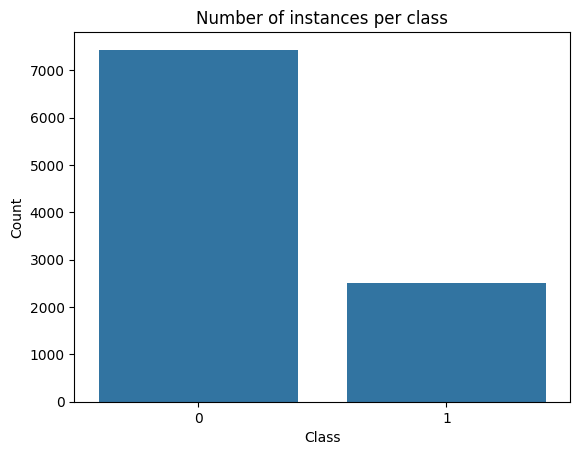

In [25]:
sns.countplot(data=customers,x="HasDefault")
plt.title("Number of instances per class")
plt.xlabel('Class')
plt.ylabel("Count")
plt.show()


- Defining X and y

In [28]:
X=customers.drop('HasDefault',axis=1)
y=customers['HasDefault']

In [30]:
X.head()

,CustomerId,CreditType,CreditAmount,Duration_Months,NumberOfInstallmentsToPay,PaymentFrequency,run_date,Avg_Monthly_Income,Income_Stability,Avg_Monthly_expenses,...,Previous_Loans_Std,Previous_Loan_Defaults,Active_Loans_Count,Active_Loan_Amount_Total,SegGroup,AMLRiskRating,YrNetMonthlyIn,Age,Is_Employed,Is_Married
0,61989,Credit Card,650000.0,36.0,0,Monthly,20230630,3.088140e+06,4.465342e+06,2.381424e+07,...,0.0,0.0,0.0,0.0,Personal,Elevado,1000000.00,64,1,1
1,75075,Credit Card,130000.0,36.0,0,Monthly,20230630,8.468346e+05,1.606619e+06,2.438573e+05,...,0.0,0.0,0.0,0.0,Personal,Baixo,0.00,47,0,1
2,79216,Credit Card,100000.0,36.0,0,Monthly,20230630,2.953333e+05,1.955130e+05,2.507907e+05,...,0.0,0.0,0.0,0.0,Personal,Baixo,224227.75,70,1,1
3,96717,Credit Card,750000.0,36.0,0,Monthly,20230630,9.513645e+05,6.054409e+05,1.157047e+06,...,0.0,0.0,0.0,0.0,Personal,Baixo,6000000.00,46,1,1
4,96717,Credit Card,750000.0,36.0,0,Monthly,20230630,9.513645e+05,6.054409e+05,1.157047e+06,...,0.0,0.0,0.0,0.0,Personal,Baixo,6000000.00,46,1,1


In [31]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: HasDefault, dtype: int64

## 2. Splitting the data

In [59]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

## 3. Transforming variables


In [61]:
categorical_cols=X.select_dtypes(include='object').columns.tolist()
categorical_cols

['CreditType', 'PaymentFrequency', 'SegGroup', 'AMLRiskRating']

- NumberOfInstallmentsToPay

In [52]:
X["NumberOfInstallmentsToPay"].value_counts()

NumberOfInstallmentsToPay
0      9084
61      353
62      213
1        49
63       48
37       38
25       36
13       17
49       13
50       11
38       10
2        10
19        8
26        6
31        5
51        5
39        5
14        3
12        3
86        3
27        3
9         2
7         2
60        2
18        2
43        1
66        1
20        1
245       1
11        1
21        1
98        1
6         1
326       1
56        1
45        1
32        1
28        1
4         1
17        1
183       1
42        1
29        1
Name: count, dtype: int64

In [53]:
X["NumberOfInstallmentsToPay"]=X["NumberOfInstallmentsToPay"].str.replace("M","").astype(float).astype(int)

AttributeError: Can only use .str accessor with string values!

- Categorical columns

In [41]:
categorical_cols=X.select_dtypes(include='object').columns.tolist()
categorical_cols

['CreditType', 'PaymentFrequency', 'SegGroup', 'AMLRiskRating']

- Numerical columns

In [42]:
numerical_cols=X.select_dtypes(include=[int,float]).columns.tolist()

In [48]:
preprocessor=ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_cols),
        ('cat',OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)


preprocessor.fit(X_train)
models={
    'LogisticRegression': LogisticRegression(),
    'Random Forest' : RandomForestClassifier(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metrics='logloss'),
    'Gradient Boosting' : GradientBoostingClassifier()
}

for name, model in models.items():
    pipeline=Pipeline(steps=[
        ('preprocessing', preprocessor),
        ('classifier',model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred=pipeline.predict(X_test)
    print(f"\n{name}")
    print(f"Accuracy: {accuracy_score(y_test,y_pred):.3f}")
    print(f"Precision: {precision_score(y_test,y_pred):.3f}")
    print(f"Recall: {recall_score(y_test,y_pred):.3f}")
    print(f"F1 Score: {f1_score(y_test,y_pred):.3f}")
    print(classification_report(y_test,y_pred))



ValueError: could not convert string to float: '2M'